In [1]:
#Import the libraries that will be used
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path = 'water_useAZ_converted.csv'
#Making a datframe out of the 
AZ_raw = pd.read_csv(path)
AZ_raw

path = 'water_use_NV_converted.csv'
#Making a datframe out of the 
NV_raw = pd.read_csv(path)
NV_raw

,state,county_ID,county_name,year,"Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply total population served, in thousands"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nevada,1.0,Churchill County,1985.0,8.150,0.05,8.200
2,Nevada,1.0,Churchill County,1990.0,9.270,0.00,9.270
3,Nevada,1.0,Churchill County,1995.0,12.600,0.00,12.600
4,Nevada,1.0,Churchill County,2000.0,11.310,0.00,11.310
...,...,...,...,...,...,...,...
115,Nevada,510.0,Carson City,1995.0,27.570,14.17,41.740
116,Nevada,510.0,Carson City,2000.0,30.350,19.65,50.000
117,Nevada,510.0,Carson City,2005.0,35.600,20.46,56.060
118,Nevada,510.0,Carson City,2010.0,35.190,20.01,55.200


In [6]:
AZ_county_summary = pd.DataFrame(AZ_raw.groupby("county_name").count())
NV_county_summary = pd.DataFrame(NV_raw.groupby("county_name").count())

In [7]:
AZ_county_summary["Average Ground Water Used per County"] = pd.DataFrame(AZ_raw.groupby("county_name")["Public Supply population served by groundwater, in thousands"].mean())
AZ_county_summary["Average Surface Water Used per County"] = pd.DataFrame(AZ_raw.groupby("county_name")["Public Supply population served by surface water, in thousands"].mean())

AZ_county_summary = AZ_county_summary[["Average Ground Water Used per County", "Average Surface Water Used per County"]]
AZ_county_summary

NV_county_summary["Average Ground Water Used per County"] = pd.DataFrame(NV_raw.groupby("county_name")["Public Supply population served by groundwater, in thousands"].mean())
NV_county_summary["Average Surface Water Used per County"] = pd.DataFrame(NV_raw.groupby("county_name")["Public Supply population served by surface water, in thousands"].mean())

NV_county_summary = NV_county_summary[["Average Ground Water Used per County", "Average Surface Water Used per County"]]

NV_county_summary

,Average Ground Water Used per County,Average Surface Water Used per County
county_name,,
Carson City,30.374000,16.408571
Churchill County,12.080714,0.007143
Clark County,121.901429,1177.752857
Douglas County,24.478571,8.525571
Elko County,34.225714,0.687857
Esmeralda County,0.725143,0.000000
Eureka County,0.981429,0.000000
Humboldt County,9.825429,0.000000
Lander County,4.205429,0.022857


In [10]:
maricopa_county = AZ_raw.loc[AZ_raw["county_name"] == "Maricopa County",:]
clark_county = NV_raw.loc[NV_raw["county_name"] == "Clark County",:]
maricopa_county_data = maricopa_county.groupby('year').max()["Public Supply population served by surface water, in thousands"]
maricopalastcounty = pd.DataFrame(maricopa_county_data)
clark_county_data = clark_county.groupby('year').max()["Public Supply population served by surface water, in thousands"]
clarklastcounty = pd.DataFrame(clark_county_data)

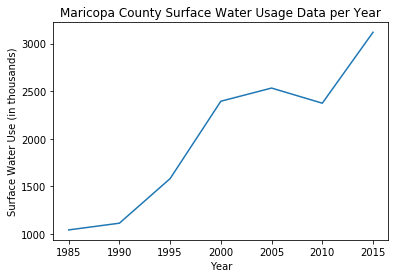

In [11]:
maricopa_county_data.plot(kind='line',x='year',y='Public Supply population served by surface water, in thousands')
plt.title("Maricopa County Surface Water Usage Data per Year")
plt.xlabel('Year')
plt.ylabel('Surface Water Use (in thousands)')
plt.show()

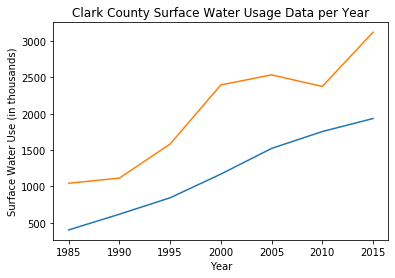

In [13]:
clark_county_data.plot(kind='line',x='year',y='Public Supply population served by surface water, in thousands')
maricopa_county_data.plot(kind='line',x='year',y='Public Supply population served by surface water, in thousands')
plt.title("Surface Water Usage")
plt.xlabel('Surface Water Use (in thousands)')
plt.ylabel('Water Use (in thousands)')
plt.legend(["Ground Water", "Surface Water"])
plt.show()

In [ ]:
df = pd.DataFrame({
...    'pig': [20, 18, 489, 675, 1776],
...    'horse': [4, 25, 281, 600, 1900]
...    }, index=[1990, 1997, 2003, 2009, 2014])
>>> lines = df.plot.line()
